In [2]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.metrics.pairwise import pairwise_distances
from matplotlib import pyplot as plt
from scipy.spatial.distance import pdist, squareform
import pandas as pd

# Creating shopping dataset to apply learned techniques

In [3]:
dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,Apple,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Unicorn,Yogurt
0,False,False,False,True,False,True,True,True,True,False,True
1,False,False,True,True,False,True,False,True,True,False,True
2,True,False,False,True,False,True,True,False,False,False,False
3,False,True,False,False,False,True,True,False,False,True,True
4,False,True,False,True,True,True,False,False,True,False,False


# Apriori Algorithm

In [4]:
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)
frequent_itemsets.sort_values(['support'],ascending=False)


,support,itemsets
1,1.0,(Kidney Beans)
0,0.8,(Eggs)
5,0.8,"(Kidney Beans, Eggs)"
2,0.6,(Milk)
3,0.6,(Onion)
4,0.6,(Yogurt)
6,0.6,"(Onion, Eggs)"
7,0.6,"(Kidney Beans, Milk)"
8,0.6,"(Onion, Kidney Beans)"
9,0.6,"(Kidney Beans, Yogurt)"


In [5]:
wooden_star_rules = association_rules(frequent_itemsets, metric="lift", min_threshold=.5)
wooden_star_rules.\
    sort_values(['lift','support'],ascending=False).\
    reset_index(drop=True).\
    loc[:,['antecedents','consequents','antecedent support','consequent support','confidence','lift']]

,antecedents,consequents,antecedent support,consequent support,confidence,lift
0,(Onion),(Eggs),0.6,0.8,1.00,1.25
1,"(Onion, Kidney Beans)",(Eggs),0.6,0.8,1.00,1.25
2,(Onion),"(Kidney Beans, Eggs)",0.6,0.8,1.00,1.25
3,(Eggs),(Onion),0.8,0.6,0.75,1.25
4,"(Kidney Beans, Eggs)",(Onion),0.8,0.6,0.75,1.25
5,(Eggs),"(Onion, Kidney Beans)",0.8,0.6,0.75,1.25
6,(Kidney Beans),(Eggs),1.0,0.8,0.80,1.00
7,(Eggs),(Kidney Beans),0.8,1.0,1.00,1.00
8,(Kidney Beans),(Milk),1.0,0.6,0.60,1.00
9,(Milk),(Kidney Beans),0.6,1.0,1.00,1.00


# Cosine similarity among baskets

In [10]:
# each row/column represents a basket and the elements in the table are cosine index
cosine_sim = 1-pairwise_distances(df,metric='cosine')
cosine_sim = pd.DataFrame(cosine_sim)
cosine_sim

,0,1,2,3,4
0,1.000000,0.833333,0.612372,0.547723,0.547723
1,0.833333,1.000000,0.408248,0.365148,0.547723
2,0.612372,0.408248,1.000000,0.447214,0.447214
3,0.547723,0.365148,0.447214,1.000000,0.400000
4,0.547723,0.547723,0.447214,0.400000,1.000000


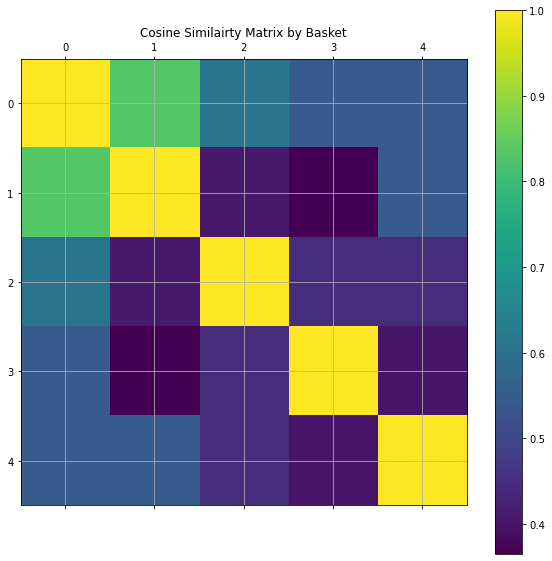

In [7]:
fig, ax = plt.subplots(figsize=(10,10))
cax = ax.matshow(cosine_sim, interpolation='nearest')
ax.grid(True)
plt.title('Cosine Similairty Matrix by Basket')
fig.colorbar(cax, ticks=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, .8,.9,1])
plt.show()

# Dice Coefficient (similarity among products)

In [8]:
a = pdist(df.T, metric='dice')
Dice_sim_prod = pd.DataFrame(1-squareform(a))
Dice_sim_prod.columns= df.columns
Dice_sim_prod.index=df.columns
#Dice_sim_prod.reset_index(inplace=True)
Dice_sim_prod

,Apple,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Unicorn,Yogurt
Apple,1.000000,0.000000,0.000000,0.400000,0.000000,0.333333,0.500000,0.000000,0.000000,0.000000,0.000000
Corn,0.000000,1.000000,0.000000,0.333333,0.666667,0.571429,0.400000,0.000000,0.400000,0.666667,0.400000
Dill,0.000000,0.000000,1.000000,0.400000,0.000000,0.333333,0.000000,0.666667,0.500000,0.000000,0.500000
Eggs,0.400000,0.333333,0.400000,1.000000,0.400000,0.888889,0.571429,0.666667,0.857143,0.000000,0.571429
Ice cream,0.000000,0.666667,0.000000,0.400000,1.000000,0.333333,0.000000,0.000000,0.500000,0.000000,0.000000
Kidney Beans,0.333333,0.571429,0.333333,0.888889,0.333333,1.000000,0.750000,0.571429,0.750000,0.333333,0.750000
Milk,0.500000,0.400000,0.000000,0.571429,0.000000,0.750000,1.000000,0.400000,0.333333,0.500000,0.666667
Nutmeg,0.000000,0.000000,0.666667,0.666667,0.000000,0.571429,0.400000,1.000000,0.800000,0.000000,0.800000
Onion,0.000000,0.400000,0.500000,0.857143,0.500000,0.750000,0.333333,0.800000,1.000000,0.000000,0.666667
Unicorn,0.000000,0.666667,0.000000,0.000000,0.000000,0.333333,0.500000,0.000000,0.000000,1.000000,0.500000


### Identify similar items in the basket with Apple

In [9]:
Dice_sim_prod.sort_values(by='Apple',ascending=False)

,Apple,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Unicorn,Yogurt
Apple,1.000000,0.000000,0.000000,0.400000,0.000000,0.333333,0.500000,0.000000,0.000000,0.000000,0.000000
Milk,0.500000,0.400000,0.000000,0.571429,0.000000,0.750000,1.000000,0.400000,0.333333,0.500000,0.666667
Eggs,0.400000,0.333333,0.400000,1.000000,0.400000,0.888889,0.571429,0.666667,0.857143,0.000000,0.571429
Kidney Beans,0.333333,0.571429,0.333333,0.888889,0.333333,1.000000,0.750000,0.571429,0.750000,0.333333,0.750000
Corn,0.000000,1.000000,0.000000,0.333333,0.666667,0.571429,0.400000,0.000000,0.400000,0.666667,0.400000
Dill,0.000000,0.000000,1.000000,0.400000,0.000000,0.333333,0.000000,0.666667,0.500000,0.000000,0.500000
Ice cream,0.000000,0.666667,0.000000,0.400000,1.000000,0.333333,0.000000,0.000000,0.500000,0.000000,0.000000
Nutmeg,0.000000,0.000000,0.666667,0.666667,0.000000,0.571429,0.400000,1.000000,0.800000,0.000000,0.800000
Onion,0.000000,0.400000,0.500000,0.857143,0.500000,0.750000,0.333333,0.800000,1.000000,0.000000,0.666667
Unicorn,0.000000,0.666667,0.000000,0.000000,0.000000,0.333333,0.500000,0.000000,0.000000,1.000000,0.500000


# Reading Case Study (Bigbasket) Dataset 

In [12]:
#path = '/Users/Vahid/Library/CloudStorage/OneDrive-UniversityofToronto/MMA2023/Jupyter files/Data/'
path = 'C:\\Users\\Vahid\\OneDrive - University of Toronto\\MMA2023\\Jupyter files\\Data\\'
df_raw = pd.read_excel(path+'IMB575-XLS-ENG.xls', sheet_name ='POS DATA' )

In [13]:
df_raw.head()

,Member,Order,SKU,Created On,Description
0,M09736,6468572,34993740,22-09-2014 22:45,Other Sauces
1,M09736,6468572,15669800,22-09-2014 22:45,Cashews
2,M09736,6468572,34989501,22-09-2014 22:45,Other Dals
3,M09736,6468572,7572303,22-09-2014 22:45,Namkeen
4,M09736,6468572,15669856,22-09-2014 22:45,Sugar


In [14]:
df_raw.shape

(62141, 5)

# Dataset description

In [15]:
df_raw['SKU'] = df_raw['SKU'].astype('object')
df_raw['Order'] = df_raw['Order'].astype('object')
df_raw.describe(include = 'object')

,Member,Order,SKU,Created On,Description
count,62141,62141,62141,62141,62141
unique,106,8387,1732,8352,216
top,M38622,6738016,15668381,14-07-2014 11:02,Other Vegetables
freq,1438,42,1702,42,4606


In [16]:
# multiple SKUs are assigned to one Description
df_raw[df_raw['Description']=='Other Vegetables']['SKU'].unique()

array([15668381, 15668379, 15668378, 15668380, 15668383, 15670107,
       15668382], dtype=object)

# Data Cleaning

In [17]:
df_raw['Description'].unique()

array(['Other Sauces', 'Cashews', 'Other Dals', 'Namkeen', 'Sugar',
       'Banana', 'Sugar Cubes', 'Other Sweets', 'Other Rice Products',
       'Utensil Scrub Pads', 'Toor Dal', 'Buns & Pavs', 'Cakes',
       'Boiled Rice', 'Urad Dal', 'Jaggery', 'Raisins', 'Chips',
       'Almonds', 'Root Vegetables', 'Other Vegetables', 'Moong Dal',
       'Healthy Snacks', 'Raw Peanuts', 'Mosquito Repellent',
       'Whole Spices', 'Soya Products', 'Beans', 'Health Drinks',
       'Liquid Soaps & Bars', 'Washing Bars', 'Ghee', 'Organic F&V',
       'Sunflower Oils', 'Shoe Polish', 'Cream Biscuits', 'Cookies',
       'Snacky Nuts', 'Avalakki / Poha', 'Besan', 'Raw Rice',
       'Powdered Spices', 'Eggs', 'Corn Snacks', 'Bread',
       'Instant Noodles', 'Sooji & Rava', 'Gourd & Cucumber',
       'Shaving Cream, Foam & Gels', 'Brinjals', 'Hair Oil',
       'Ground Coffee', 'Other Dry Fruits', 'Basmati Rice', 'Face Wash',
       'Yogurt & Lassi', 'Wafers', 'Instant Pastas', 'Cooking Paste',
       'O

### Removing noise in the dataset

In [18]:
df_raw = df_raw [~ df_raw['Description'].isin(['CFLs,cfls,7832553,2,0\r\n7831582,Channa Dal,channa-dal,7832491,2,0\r\n7832360,Cheese,cheese,7832363,2,0\r\n7831689,Chewing Gum,chewing-gum,7831685,2,0\r\n7832047,ChildrenS Books'])]

# Is there any null value?

In [19]:
df_raw.isnull().sum()

Member         0
Order          0
SKU            0
Created On     0
Description    0
dtype: int64